In [1]:
import pandas as pd
import datetime as dt
import os
from GeneralUtilities import GeneralUtilities
from backtest import Backtester
# General Utilities Object Instance
GU = GeneralUtilities()
# Backtester Object Instance
BT = Backtester()


In [2]:

rawData = pd.read_csv('Data/adjclose/backtest_13ETF_fm.csv', index_col=0)
date = rawData.index
date = [dt.datetime.strptime(d, '%Y-%m-%d').date() for d in date]
rawData.index = date
tickers_raw = rawData.columns

rawData = rawData.pct_change()


start_date = dt.datetime.strptime('2018-01-01', '%Y-%m-%d').date()
end_date = dt.datetime.strptime('2020-01-01', '%Y-%m-%d').date()

def idxTarget(target, dataFrame):
    # Returns index where the value can be found
    # String
    if type(target) == str:
        #print('It is a string type')
        targetIdx = dataFrame.index.get_loc(target, method='bfill')
    # DateTime
    if type(target) == (dt.date or dt.datetime):
        if target < dataFrame.index[0]:
            targetIdx = 0 # when date inputted is earlier than the entire range
        elif target > dataFrame.index[-1]:
            targetIdx = dataFrame.shape[0] # when date inputted is later than the entire range
        else:
            targetIdx = dataFrame.index.get_loc(target, method='bfill')
    return targetIdx

start_idx = idxTarget(start_date, rawData)
end_idx = idxTarget(end_date, rawData)


rawData = rawData.iloc[start_idx: end_idx]

composition = pd.read_csv('../zipline/composition_QQQLQD.csv', index_col=0)
rb_date = composition.index
rb_date = [dt.datetime.strptime(rb_d, '%Y-%m-%d').date() for rb_d in rb_date]
composition.index = rb_date
tickers_comp = composition.columns

annualization = 252
portName = 'pn'
directory = './QQQ/'
leverageCap = 1
lev_cost = .02
min_level = .5

try:
    os.mkdir(directory)
except FileExistsError:
    print('', end='\r')


In [3]:
'''
allocation = pd.read_csv(dataPath + 'allocation.csv', index_col=0)
composition = allocation.T
rb_date = [rawData.index[1]]
composition.index = rb_date
tickers_comp = composition.columns
'''


"\nallocation = pd.read_csv(dataPath + 'allocation.csv', index_col=0)\ncomposition = allocation.T\nrb_date = [rawData.index[1]]\ncomposition.index = rb_date\ntickers_comp = composition.columns\n"

In [4]:
tickers = list(set(tickers_raw) & set(tickers_comp))


Overall Return is 0.239461


Annual Return  Annual Volatility  Annual Sharpe Ratio  Cumulative Return  \
pn       0.113549           0.174817             0.702852           0.239461   

     Max. DD  Return DD. Ratio  
pn -0.227969          -1.05041

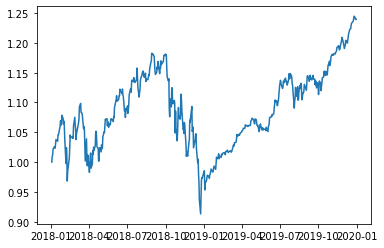

In [5]:
BT.backtest(rawData[tickers], composition[tickers], rb_date, annualization, portName, directory, leverageCap, lev_cost, min_level)
